<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/Informer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인포머 훈련 및 예측

## Download code and dataset

In [1]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 553 (delta 7), reused 13 (delta 4), pack-reused 535
Receiving objects: 100% (553/553), 6.48 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (313/313), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 187 (delta 66), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (187/187), 3.85 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (66/66), done.
ETDataset  Informer2020  sample_data


In [2]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [3]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [3]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [29]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'ETTh1' # data
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'ETTh1.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.do_predict= True # 이걸로 예측한다!
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'
args.inverse = True # 이걸로 standardscaler 되돌려 놓는다!

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [30]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'do_predict': True, 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'inverse': True, 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3'}


In [7]:
Exp = Exp_Informer

In [8]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 9.2217016
	speed: 0.2648s/iter; left time: 396.4015s
	iters: 200, epoch: 1 | loss: 5.8806410
	speed: 0.2644s/iter; left time: 369.3255s
Epoch: 1 cost time: 70.67933773994446
Epoch: 1, Steps: 266 | Train Loss: 8.0035959 Vali Loss: 10.3067389 Test Loss: 12.8453894
Validation loss decreased (inf --> 10.306739).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 4.5995007
	speed: 0.5642s/iter; left time: 694.5547s
	iters: 200, epoch: 2 | loss: 5.1695399
	speed: 0.2687s/iter; left time: 303.8931s
Epoch: 2 cost time: 71.40984225273132
Epoch: 2, Steps: 266 | Train Loss: 4.3142382 Vali Loss: 10.2453651 Test Loss: 11.1755428
Validation loss decreased (10.306739 --> 10.245365).  Saving model ...
Updating learning rate to 5e-05
	iters: 100, epoch:

## Prediction

### More details about Prediction - prediction function

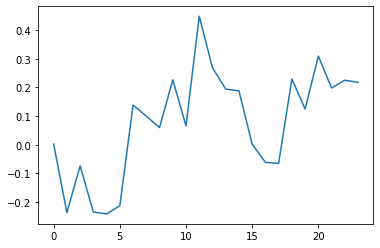

In [52]:
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(prediction[0,:,-1])
# plt.show()

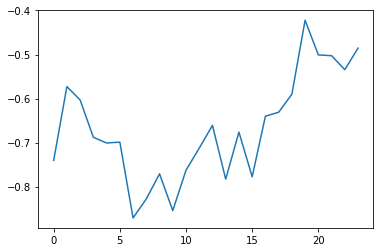

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(prediction[0,:,-1])
# plt.show()

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).

## Custom Data

Custom data (xxx.csv) has to include at least 2 features: `date`(format: `YYYY-MM-DD hh:mm:ss`) and `target feature`.


# args.pred_len = 24 # prediction sequence length를 보면

# 24개만 예측가능하므로 ETTh2.csv 마지막 24개를 떼서 테스트 해보자.

In [10]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader
import pandas as pd
import os

In [12]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.data = 'custom' # data
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'ETTh2.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [15]:
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,39.202999,11.392,49.644001,11.929,-10.331,-1.258,47.084999
17416,2018-06-26 16:00:00,38.113998,10.974,48.759998,11.366,-10.331,-1.290,48.183498
17417,2018-06-26 17:00:00,39.622002,10.974,50.609001,11.661,-11.557,-1.418,48.183498
17418,2018-06-26 18:00:00,43.643002,13.403,54.737000,13.778,-10.299,-1.418,46.865501


In [13]:
!pwd

/content


# ETTh2.csv에서 맨 뒤 24개만 뺀 ETTh2_train

In [53]:
ETTh2_train = df[:-24]
ETTh2_train.tail()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17391,2018-06-25 15:00:00,36.104000,17.004999,45.917999,11.661,-9.542,-2.463,50.625000
17392,2018-06-25 16:00:00,40.041000,10.471000,51.252998,11.366,-10.757,-1.844,49.745998
17393,2018-06-25 17:00:00,39.622002,10.722000,50.931000,11.124,-10.757,-1.844,48.867001
17394,2018-06-25 18:00:00,39.202999,9.801000,49.055000,10.079,-9.499,-1.290,47.988499
17395,2018-06-25 19:00:00,37.778999,8.796000,47.125000,8.953,-9.499,-1.535,46.450001


In [54]:
save_path = '/content/ETDataset/ETT-small/'
ETTh2_train.to_csv(save_path + 'ETTh2_train.csv', index=False)
pd.read_csv(save_path + 'ETTh2_train.csv').tail()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17391,2018-06-25 15:00:00,36.104000,17.004999,45.917999,11.661,-9.542,-2.463,50.625000
17392,2018-06-25 16:00:00,40.041000,10.471000,51.252998,11.366,-10.757,-1.844,49.745998
17393,2018-06-25 17:00:00,39.622002,10.722000,50.931000,11.124,-10.757,-1.844,48.867001
17394,2018-06-25 18:00:00,39.202999,9.801000,49.055000,10.079,-9.499,-1.290,47.988499
17395,2018-06-25 19:00:00,37.778999,8.796000,47.125000,8.953,-9.499,-1.535,46.450001


# ETTh2.csv에서 맨 뒤 24개만 뺀 ETTh2_train에서 뒤에서 96개만으로 만든 ETTh2_train_96.csv

## 반드시 args.seq_len = 96 만큼의 데이터가 있어야한다!

In [81]:
ETTh2_train_96 = pd.read_csv(save_path + 'ETTh2_train.csv')[-96:]
ETTh2_train_96

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17300,2018-06-21 20:00:00,37.109001,11.309000,47.070999,11.366,-9.414,-1.215,38.320499
17301,2018-06-21 21:00:00,38.533001,11.141000,47.714001,11.339,-9.339,-1.311,37.661499
17302,2018-06-21 22:00:00,35.014999,10.639000,44.417000,10.803,-9.339,-1.237,37.001999
17303,2018-06-21 23:00:00,35.433998,10.974000,44.632000,11.312,-9.382,-1.269,36.782501
17304,2018-06-22 00:00:00,32.669998,11.141000,42.005001,10.964,-9.243,0.000,36.562500
...,...,...,...,...,...,...,...,...
17391,2018-06-25 15:00:00,36.104000,17.004999,45.917999,11.661,-9.542,-2.463,50.625000
17392,2018-06-25 16:00:00,40.041000,10.471000,51.252998,11.366,-10.757,-1.844,49.745998
17393,2018-06-25 17:00:00,39.622002,10.722000,50.931000,11.124,-10.757,-1.844,48.867001
17394,2018-06-25 18:00:00,39.202999,9.801000,49.055000,10.079,-9.499,-1.290,47.988499


In [82]:
save_path = '/content/ETDataset/ETT-small/'
ETTh2_train_96.to_csv(save_path + 'ETTh2_train_96.csv', index=False)
pd.read_csv(save_path + 'ETTh2_train_96.csv')

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2018-06-21 20:00:00,37.109001,11.309000,47.070999,11.366,-9.414,-1.215,38.320499
1,2018-06-21 21:00:00,38.533001,11.141000,47.714001,11.339,-9.339,-1.311,37.661499
2,2018-06-21 22:00:00,35.014999,10.639000,44.417000,10.803,-9.339,-1.237,37.001999
3,2018-06-21 23:00:00,35.433998,10.974000,44.632000,11.312,-9.382,-1.269,36.782501
4,2018-06-22 00:00:00,32.669998,11.141000,42.005001,10.964,-9.243,0.000,36.562500
...,...,...,...,...,...,...,...,...
91,2018-06-25 15:00:00,36.104000,17.004999,45.917999,11.661,-9.542,-2.463,50.625000
92,2018-06-25 16:00:00,40.041000,10.471000,51.252998,11.366,-10.757,-1.844,49.745998
93,2018-06-25 17:00:00,39.622002,10.722000,50.931000,11.124,-10.757,-1.844,48.867001
94,2018-06-25 18:00:00,39.202999,9.801000,49.055000,10.079,-9.499,-1.290,47.988499


# ETTh2.csv에서 테스트용으로 쓸 맨뒤 24개

In [57]:
ETTh2_test = df[-24:]
ETTh2_test.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17396,2018-06-25 20:00:00,43.558998,10.806,52.619999,10.910,-9.499,-1.514,44.692001
17397,2018-06-25 21:00:00,44.731998,12.649,53.905998,11.982,-9.478,0.000,43.813499
17398,2018-06-25 22:00:00,42.470001,12.398,50.313999,11.446,-7.047,0.000,42.910500
17399,2018-06-25 23:00:00,44.816002,13.152,53.771999,12.384,-8.945,0.000,42.470501
17400,2018-06-26 00:00:00,42.219002,12.481,50.153999,11.553,-8.049,0.000,42.250999


In [59]:
save_path = '/content/ETDataset/ETT-small/'
ETTh2_test.to_csv(save_path + 'ETTh2_test.csv', index=False)
pd.read_csv(save_path + 'ETTh2_test.csv')

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2018-06-25 20:00:00,43.558998,10.806,52.619999,10.910,-9.499,-1.514,44.692001
1,2018-06-25 21:00:00,44.731998,12.649,53.905998,11.982,-9.478,0.000,43.813499
2,2018-06-25 22:00:00,42.470001,12.398,50.313999,11.446,-7.047,0.000,42.910500
3,2018-06-25 23:00:00,44.816002,13.152,53.771999,12.384,-8.945,0.000,42.470501
4,2018-06-26 00:00:00,42.219002,12.481,50.153999,11.553,-8.049,0.000,42.250999
5,2018-06-26 01:00:00,36.773998,10.555,46.320000,10.186,-9.425,0.000,41.811501
6,2018-06-26 02:00:00,35.182999,9.885,44.550999,10.213,-9.425,-1.290,40.932499
7,2018-06-26 03:00:00,29.486000,7.958,39.537998,8.471,-9.425,-1.471,40.493000
8,2018-06-26 04:00:00,34.596001,10.555,44.175999,10.561,-9.489,-1.322,40.053501
9,2018-06-26 05:00:00,27.476000,7.120,37.716000,7.988,-9.542,-1.578,39.614498


args 새로 지정

In [86]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # 개인 데이터는 custom으로 설정해라.
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'ETTh2_train.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.do_predict= True # 이걸로 예측한다!
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'
args.inverse = True # 이걸로 standardscaler 되돌려 놓는다!

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [77]:
setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [87]:
print('Args in Test:')
print(args)

Args in Test:
{'model': 'informer', 'data': 'custom', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh2_train.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'do_predict': True, 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'inverse': True, 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3'}


setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0' 의 setting은 사전 훈련된 모델이고,

exp = Exp(args)으로 돌린다.

In [88]:
################# 이게 없으면 에러난다!!! #################
################# 반드시 꼭 실행!! ########################
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [95]:
# 이걸로 실행해라!!!!
# 걍 여기서 알아서 하는거엿어!!!

from exp.exp_informer import Exp_Informer
Exp = Exp_Informer

exp = Exp(args) 
# exp_informer.py -> class Exp_Informer -> exp_basic.py -> self.model = self._build_model().to(self.device) 
# -> def _build_model -> return model

exp.predict(setting, True)
# def predict -> def _get_data -> 

Use GPU: cuda:0
pred 1


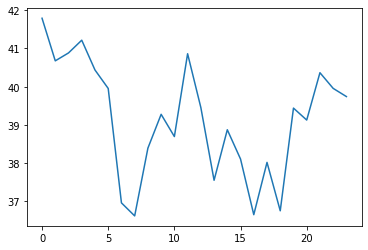

In [96]:
# ETTh2_train.csv

import numpy as np
import matplotlib.pyplot as plt

real_prediction = np.load('./results/'+setting+'/real_prediction.npy')

plt.figure()
plt.plot(real_prediction[0,:,-1])
plt.show()

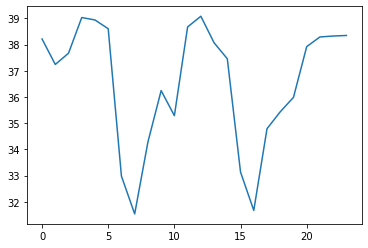

In [84]:
# ETTh2_train_96.csv로 돌리는 것

import numpy as np
import matplotlib.pyplot as plt

real_prediction = np.load('./results/'+setting+'/real_prediction.npy')

plt.figure()
plt.plot(real_prediction[0,:,-1])
plt.show()

# 데이터가 많으면 좀 더 정확하게 그린다.

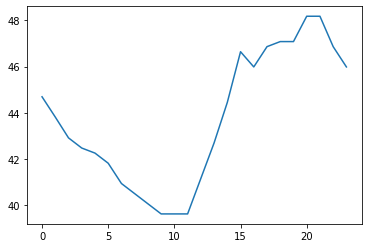

In [97]:
# 실제 정답

answer = pd.read_csv('/content/ETDataset/ETT-small/ETTh2_test.csv')
plt.figure()
plt.plot(answer.OT)
plt.show()